In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [3]:
# Loading the Breast Cancer Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [5]:
# Display dataset information
print(f"Dataset shape: {X.shape}")
print(f"Target classes: {y.unique()}")

Dataset shape: (569, 30)
Target classes: [0 1]


In [19]:
# Check for missing values
print(X.isnull().sum().sum())  # Ensure no missing values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
results = {}

print("Data preprocessing completed successfully!")

0
Data preprocessing completed successfully!


In [21]:
# Function to evaluate a model
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    results[name] = {"Accuracy": acc, "ROC-AUC": roc_auc}
    return model

In [23]:
# Logistic Regression
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



LogisticRegression()

In [27]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_clf, "Decision Tree")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



DecisionTreeClassifier(random_state=42)

In [29]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(rf_clf, "Random Forest")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



RandomForestClassifier(random_state=42)

In [31]:
# Support Vector Machine
svm_clf = SVC(probability=True, random_state=42)
evaluate_model(svm_clf, "SVM")


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



SVC(probability=True, random_state=42)

In [33]:
# k-Nearest Neighbors
knn_clf = KNeighborsClassifier()
evaluate_model(knn_clf, "k-NN")


k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



KNeighborsClassifier()

In [41]:
# Comparing Model Performances
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                     Accuracy   ROC-AUC
Logistic Regression  0.973684  0.997380
Decision Tree        0.947368  0.943990
Random Forest        0.964912  0.995251
SVM                  0.982456  0.997380
k-NN                 0.947368  0.981985


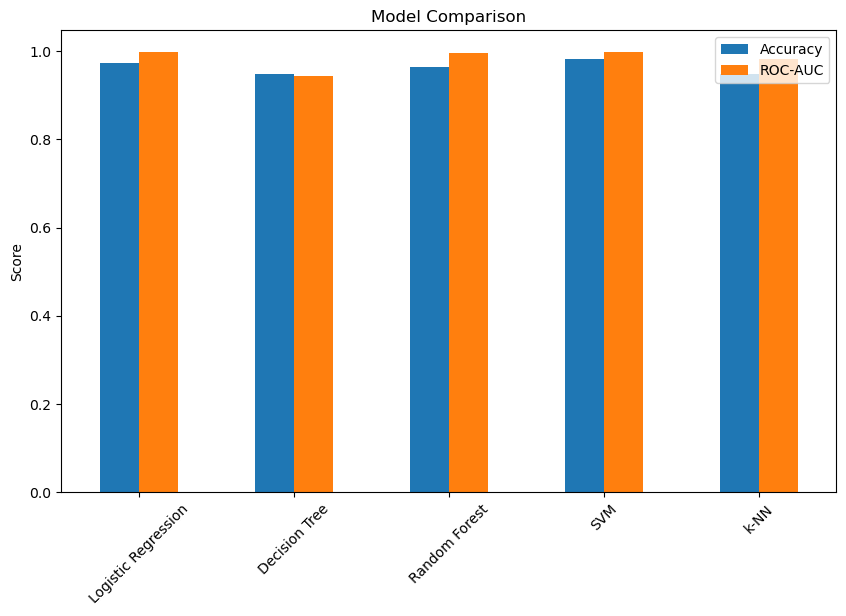

In [43]:
# Plotting the Results
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.show()

In [55]:
# Conclusion
best_model = results_df["Accuracy"].idxmax()
print(f"The best model is {best_model} with an accuracy of {results_df.loc[best_model, 'Accuracy']:.2f}.")

worst_model = results_df["Accuracy"].idxmin()
print(f"The worst model is {worst_model} with an accuracy of {results_df.loc[worst_model, 'Accuracy']:.2f}.")


The best model is SVM with an accuracy of 0.98.
The worst model is Decision Tree with an accuracy of 0.95.
